In [28]:
import matplotlib.pyplot as plt

def parse_tsp_file(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()

    coords = []
    coord_section = False
    edge_weight_type = None

    for line in lines:
        line = line.strip()

        if line.startswith('EDGE_WEIGHT_TYPE'):
            edge_weight_type = line.split(':')[1].strip().upper()
            if edge_weight_type not in ('EUC_2D', 'CEIL_2D', 'GEO'):
                raise ValueError(f"Unsupported EDGE_WEIGHT_TYPE: {edge_weight_type}")

        if line.startswith('NODE_COORD_SECTION'):
            coord_section = True
            continue

        if line.startswith('EOF'):
            break

        if coord_section:
            parts = line.split()
            if len(parts) >= 3:
                _, x, y = parts
                coords.append((float(x), float(y)))

    if edge_weight_type is None:
        raise ValueError("EDGE_WEIGHT_TYPE not found in the .tsp file!")

    return edge_weight_type, coords

def geo_to_degrees(coord):
    # Convert GEO TSPLIB format to decimal degrees
    deg = int(coord)
    min_ = coord - deg
    return deg + (min_ * 100) / 60

def preprocess_coords(edge_weight_type, coords):
    if edge_weight_type == 'GEO':
        # Convert each (longitude, latitude) properly
        return [(geo_to_degrees(x), geo_to_degrees(y)) for x, y in coords]
    else:
        # For EUC_2D and CEIL_2D, no conversion needed
        return coords

def plot_tsp(coords, tour, cost):
    xs, ys = zip(*coords)

    plt.figure(figsize=(8, 6))
    plt.scatter(xs, ys, c='blue')
    
    # Connect cities in tour order if given
    if tour:
        tour_coords = [coords[i] for i in tour]
        tour_coords.append(coords[tour[0]])  # to close the cycle
        tx, ty = zip(*tour_coords)
        plt.plot(tx, ty, 'r--', alpha=0.7)

    plt.text(tour_coords[0][0], tour_coords[0][1], 'X', fontsize=15, ha='right')

    # Annotate city numbers
    # for idx, (x, y) in enumerate(coords):
    #     plt.text(x, y, str(idx+1), fontsize=10, ha='right')

    plt.xlabel('X' if edge_weight_type != 'GEO' else 'Longitude')
    plt.ylabel('Y' if edge_weight_type != 'GEO' else 'Latitude')
    plt.title(f'TSP tour; cost: {cost:.2f}')
    plt.grid()
    plt.show()

def read_tsp_output(file_path):
    """
    Reads the OR-Tools output file and returns the cost and tour.
    
    Parameters:
    file_path (str): Path to the OR-Tools output file.
    
    Returns:
    tuple: (cost, tour)
    """
    with open(file_path, 'r') as f:
        # Read the first line (cost)
        cost = float(f.readline().strip())
        # Read the second line (tour)
        tour = list(map(lambda x: int(x)-1, f.readline().strip().split()))
    return cost, tour

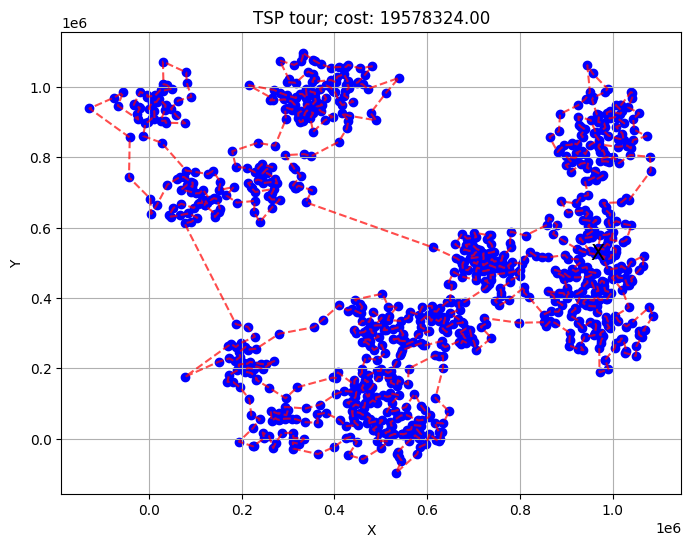

In [29]:
# tsp_file = 'small/four.tsp'
# tsp_file = 'tsplib/a280.tsp'
tsp_file = 'tests/ceil2d-dsj1000.tsp'
edge_weight_type, raw_coords = parse_tsp_file(tsp_file)
cost, tour = read_tsp_output('tests/ceil2d-dsj1000_ortools.out')

# Example tour
example_tour = list(range(len(raw_coords)))

coords = preprocess_coords(edge_weight_type, raw_coords)

# Example: no tour given yet, just plot the points
plot_tsp(coords, tour, cost)

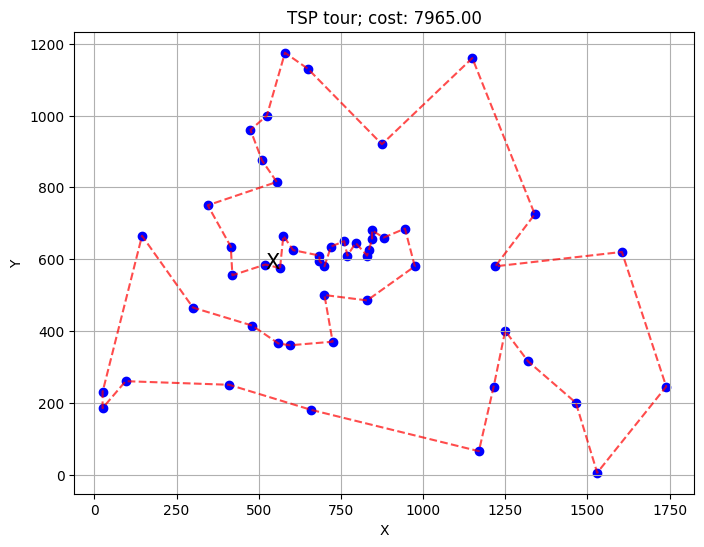

In [31]:
# tsp_file = 'small/four.tsp'
# tsp_file = 'tsplib/a280.tsp'
name = 'euc2d-berlin52'
tsp_file = f'tests/{name}.tsp'
edge_weight_type, raw_coords = parse_tsp_file(tsp_file)
cost, tour = read_tsp_output(f'tests/{name}_ortools.out')

# Example tour
example_tour = list(range(len(raw_coords)))

coords = preprocess_coords(edge_weight_type, raw_coords)

# Example: no tour given yet, just plot the points
plot_tsp(coords, tour, cost)

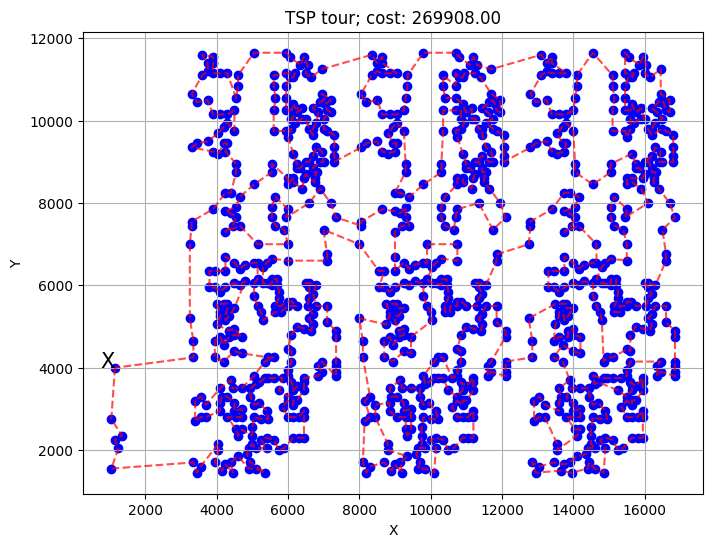

In [32]:
# tsp_file = 'small/four.tsp'
# tsp_file = 'tsplib/a280.tsp'
name = 'euc2d-pr1002'
tsp_file = f'tests/{name}.tsp'
edge_weight_type, raw_coords = parse_tsp_file(tsp_file)
cost, tour = read_tsp_output(f'tests/{name}_ortools.out')

# Example tour
example_tour = list(range(len(raw_coords)))

coords = preprocess_coords(edge_weight_type, raw_coords)

# Example: no tour given yet, just plot the points
plot_tsp(coords, tour, cost)

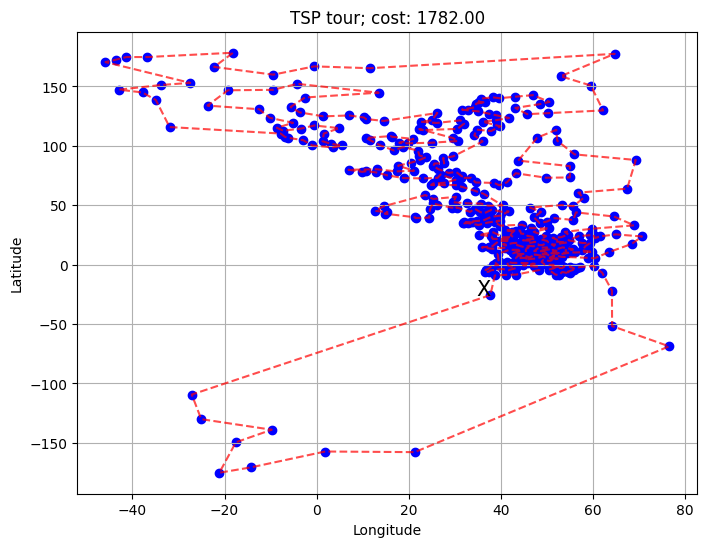

In [34]:
# tsp_file = 'small/four.tsp'
# tsp_file = 'tsplib/a280.tsp'
name = 'geo-gr431'
tsp_file = f'tests/{name}.tsp'
edge_weight_type, raw_coords = parse_tsp_file(tsp_file)
cost, tour = read_tsp_output(f'tests/{name}_ortools.out')

# Example tour
example_tour = list(range(len(raw_coords)))

coords = preprocess_coords(edge_weight_type, raw_coords)

# Example: no tour given yet, just plot the points
plot_tsp(coords, tour, cost)

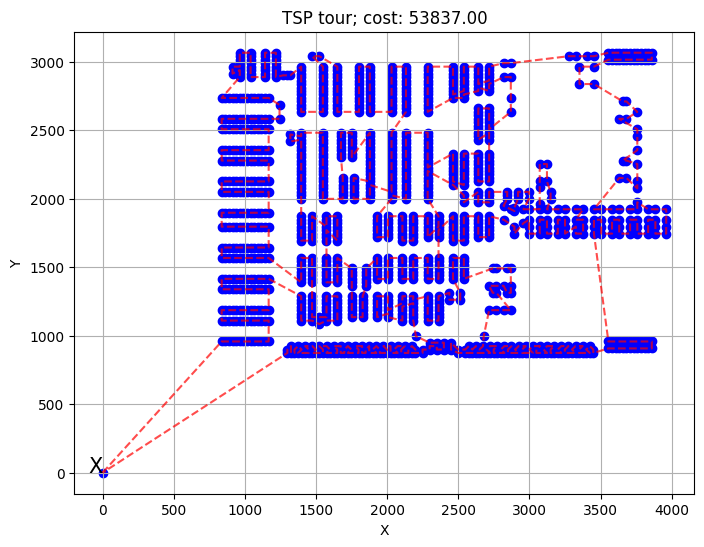

In [36]:
# tsp_file = 'small/four.tsp'
# tsp_file = 'tsplib/a280.tsp'
name = 'euc2d-d1291'
tsp_file = f'tests/{name}.tsp'
edge_weight_type, raw_coords = parse_tsp_file(tsp_file)
cost, tour = read_tsp_output(f'tests/{name}_ortools.out')

# Example tour
example_tour = list(range(len(raw_coords)))

coords = preprocess_coords(edge_weight_type, raw_coords)

# Example: no tour given yet, just plot the points
plot_tsp(coords, tour, cost)